# Bank Credit Card Default Prediction 

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('BankCreditCard.csv')

In [3]:
dataset.rename(columns=lambda x:x.lower(),inplace=True)

In [4]:
dataset

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
customer id               30000 non-null int64
credit_amount             30000 non-null float64
gender                    30000 non-null int64
academic_qualification    30000 non-null int64
marital                   30000 non-null int64
age_years                 30000 non-null int64
repayment_status_jan      30000 non-null int64
repayment_status_feb      30000 non-null int64
repayment_status_march    30000 non-null int64
repayment_status_april    30000 non-null int64
repayment_status_may      30000 non-null int64
repayment_status_june     30000 non-null int64
jan_bill_amount           30000 non-null float64
feb_bill_amount           30000 non-null float64
march_bill_amount         30000 non-null float64
april_bill_amount         30000 non-null float64
may_bill_amount           30000 non-null float64
june_bill_amount          30000 non-null float64
previous_payment_jan      30000

In [6]:
dataset.describe()

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [7]:
dataset.head(10)

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


In [8]:
dataset.columns

Index(['customer id', 'credit_amount', 'gender', 'academic_qualification',
       'marital', 'age_years', 'repayment_status_jan', 'repayment_status_feb',
       'repayment_status_march', 'repayment_status_april',
       'repayment_status_may', 'repayment_status_june', 'jan_bill_amount',
       'feb_bill_amount', 'march_bill_amount', 'april_bill_amount',
       'may_bill_amount', 'june_bill_amount', 'previous_payment_jan',
       'previous_payment_feb', 'previous_payment_march',
       'previous_payment_april', 'previous_payment_may',
       'previous_payment_june', 'default_payment'],
      dtype='object')

In [9]:
#Checking null values
dataset.isnull().sum()

customer id               0
credit_amount             0
gender                    0
academic_qualification    0
marital                   0
age_years                 0
repayment_status_jan      0
repayment_status_feb      0
repayment_status_march    0
repayment_status_april    0
repayment_status_may      0
repayment_status_june     0
jan_bill_amount           0
feb_bill_amount           0
march_bill_amount         0
april_bill_amount         0
may_bill_amount           0
june_bill_amount          0
previous_payment_jan      0
previous_payment_feb      0
previous_payment_march    0
previous_payment_april    0
previous_payment_may      0
previous_payment_june     0
default_payment           0
dtype: int64

### Columns are not having any null values

# Data Visualisation and Analysis

In [10]:
correlation = dataset.corr()

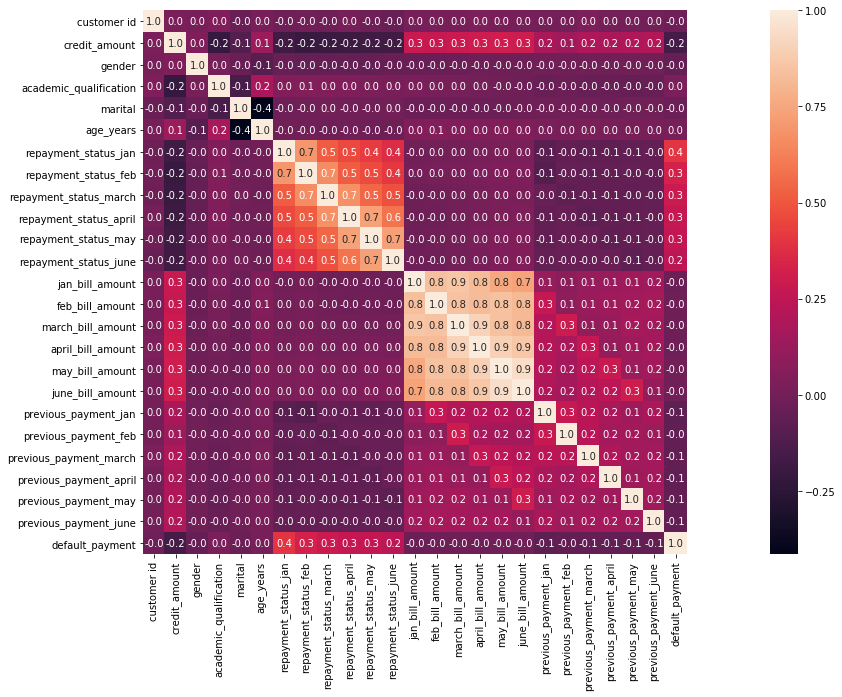

In [11]:

plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

So it looks like the repayment_status variables are the strongest predictors of default, followed by the previous_payment and bill_amount variables.

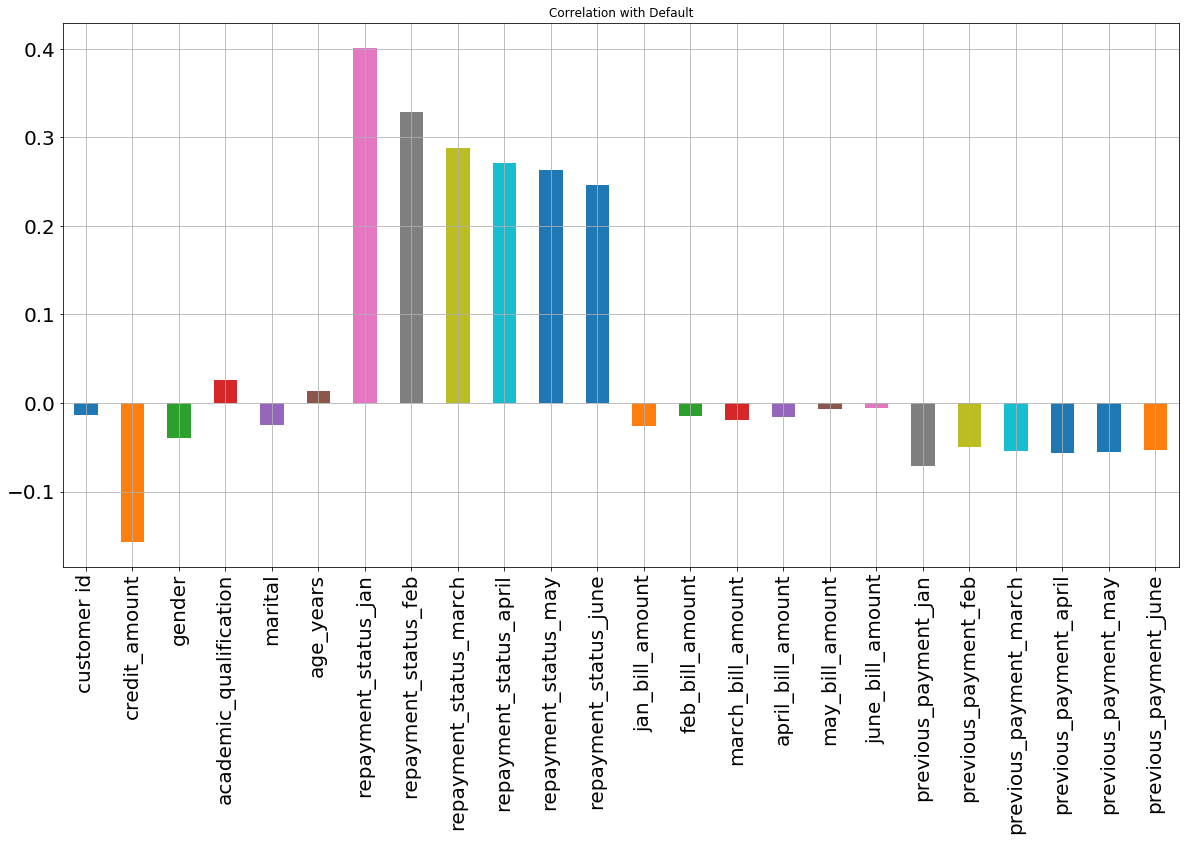

In [12]:
X = dataset.drop(['default_payment'],axis=1)
X.corrwith(dataset['default_payment']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)


It seems from the above graph is that most negatively correlated feature is Credit_Amount but we cannot blindly remove this feature because it is very important feature for prediction.

In [13]:
dataset1=dataset.rename(columns={"repayment_status_jan": "Pay_1", "repayment_status_feb": "Pay_2","repayment_status_march":"Pay_3","repayment_status_april":"Pay_4","repayment_status_may":"Pay_5","repayment_status_june":"Pay_6"})

In [14]:
dataset1.columns

Index(['customer id', 'credit_amount', 'gender', 'academic_qualification',
       'marital', 'age_years', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'jan_bill_amount', 'feb_bill_amount', 'march_bill_amount',
       'april_bill_amount', 'may_bill_amount', 'june_bill_amount',
       'previous_payment_jan', 'previous_payment_feb',
       'previous_payment_march', 'previous_payment_april',
       'previous_payment_may', 'previous_payment_june', 'default_payment'],
      dtype='object')

In [15]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

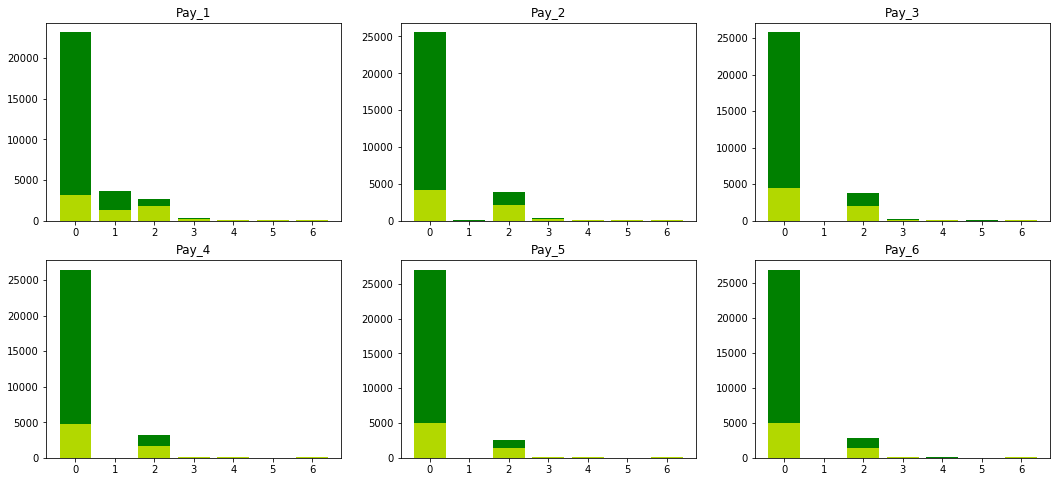

In [16]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('Pay_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset1[pay_status_columns[i]].value_counts()
    x = dataset1[pay_status_columns[i]][(dataset1['default_payment']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

In [17]:
dataset2=dataset.rename(columns={"jan_bill_amount":"Pay_Amt1","feb_bill_amount":"Pay_Amt2","march_bill_amount":"Pay_Amt3", "april_bill_amount":"Pay_Amt4","may_bill_amount":"Pay_Amt5","june_bill_amount":"Pay_Amt6"})

In [18]:
dataset2

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,Pay_Amt4,Pay_Amt5,Pay_Amt6,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


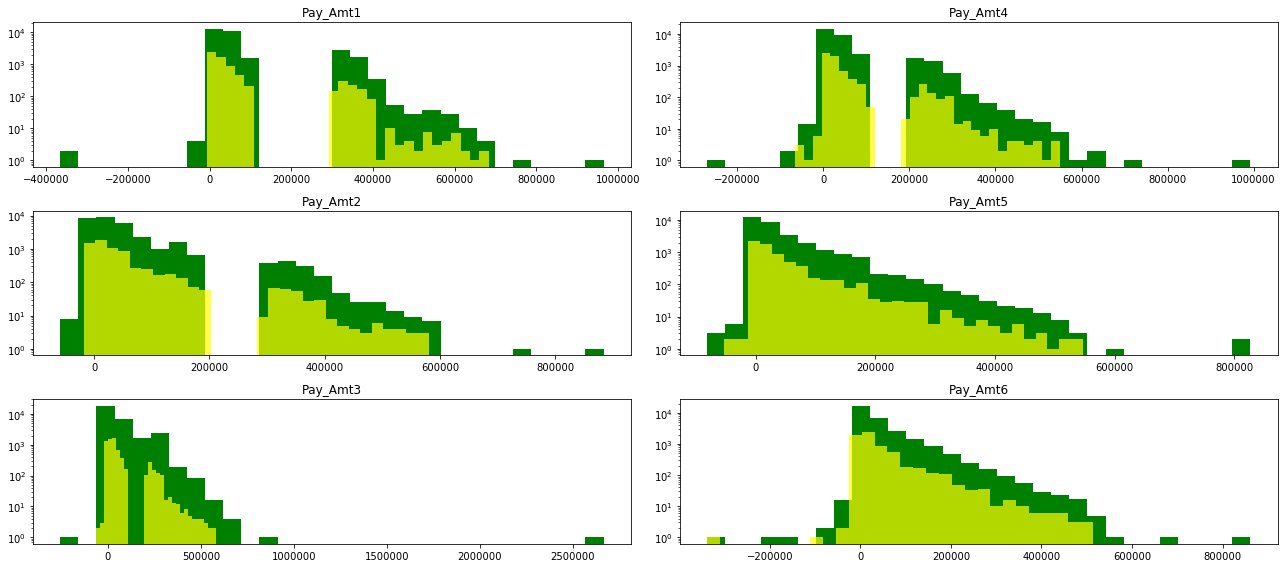

In [19]:
pay_amt_columns = getColumnsNames('Pay_Amt')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset2[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(dataset2[pay_amt_columns[i]][(dataset2['default_payment']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

In [20]:
dataset3=dataset.rename(columns={"previous_payment_jan":"Bill_Amt1",'previous_payment_feb':"Bill_Amt2", 'previous_payment_march':"Bill_Amt3",'previous_payment_april':"Bill_Amt4", 'previous_payment_may':"Bill_Amt5",'previous_payment_june':"Bill_Amt6"})

In [21]:
dataset3

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,april_bill_amount,may_bill_amount,june_bill_amount,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,default_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


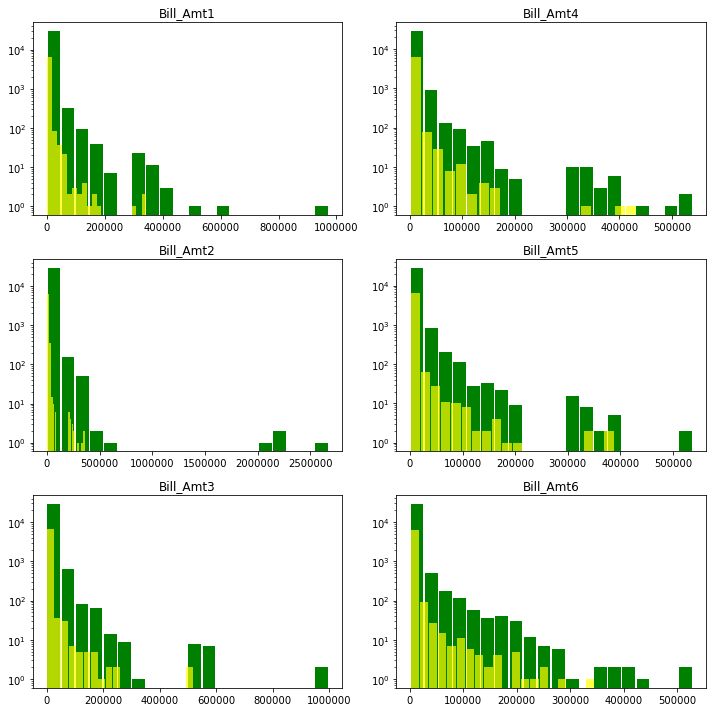

In [22]:
bill_atm_columns =  getColumnsNames('Bill_Amt')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset3[bill_atm_columns[i]], 20,rwidth=0.9, color ='green')
    ax[row,col].hist(dataset3[bill_atm_columns[i]][(dataset3['default_payment']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [23]:
dataset

,customer id,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


In [24]:
#one hot encoding
dataset['Undergraduate']=(dataset['academic_qualification']==1).astype('int')
dataset['Graduate']=(dataset['academic_qualification']==2).astype('int')
dataset['Postgraduate']=(dataset['academic_qualification']==3).astype('int')
dataset['Professional']=(dataset['academic_qualification']==4).astype('int')
dataset['Others']=(dataset['academic_qualification']==5).astype('int')
dataset.drop('academic_qualification',axis=1,inplace=True)
                                    


In [25]:
dataset['male']=(dataset['gender']==1).astype('int')
dataset.drop('gender',axis=1,inplace=True)

In [26]:
dataset['married']=(dataset['marital']==1).astype('int')
dataset['single']=(dataset['marital']==2).astype('int')
dataset.drop('marital',axis=1,inplace=True)

# for pay features if the <=0 then it means it was not delayed
Repayment_features=['repayment_status_jan','repayment_status_feb','repayment_status_march',
                    'repayment_status_april','repayment_status_may','repayment_status_june']
for p in Repayment_features:
    dataset.loc[dataset[p]<=0,p]=0

dataset.rename(columns={'default_payment':'Default'},inplace=True)

In [27]:

from sklearn.metrics import classification_report, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
customer id               30000 non-null int64
credit_amount             30000 non-null float64
gender                    30000 non-null int64
age_years                 30000 non-null int64
repayment_status_jan      30000 non-null int64
repayment_status_feb      30000 non-null int64
repayment_status_march    30000 non-null int64
repayment_status_april    30000 non-null int64
repayment_status_may      30000 non-null int64
repayment_status_june     30000 non-null int64
jan_bill_amount           30000 non-null float64
feb_bill_amount           30000 non-null float64
march_bill_amount         30000 non-null float64
april_bill_amount         30000 non-null float64
may_bill_amount           30000 non-null float64
june_bill_amount          30000 non-null float64
previous_payment_jan      30000 non-null float64
previous_payment_feb      30000 non-null float64
previous_payment_march    3

In [29]:
# Check whether the dataset is balanced or not
dataset.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

Conclusion: Unbalanced Dataset
 Model Quality:
 1. Generalization we will use Accuracy
 2. For Quality we will use Precision and Recall based 
    on Domain Question

In [ ]:
# Seperate our data as training and testing data where,
# 1. Training data is used to train the model
# 2. Testing data is used to judge the quality of the model
target_name='Default'
X=dataset.drop('Default',axis=1)
robust_scaler= RobustScaler()
X=robust_scaler.fit_transform(X)
y=dataset[target_name]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Logistic Regression

In [ ]:

# Import the estimator object 

from sklearn.linear_model import LogisticRegression

# Create an instance of the estimator
logistic_regression= LogisticRegression(random_state=15)

# Use the training data to train the estimator
logistic_regression.fit(X_train,y_train)

# Evaluate the model
y_pred_test= logistic_regression.predict(X_test)


In [ ]:
# Evaluate the model
#y_pred_test= logistic_regression.predict(X_test)

In [ ]:
# Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)

In [ ]:
CM

In [ ]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_score=roc_auc_score(y_test,y_pred_test)
log_score
round(log_score*100)

In [ ]:

log_prob=logistic_regression.predict_proba(X_test)
log_prob

In [ ]:
lgfpr,lgtpr,thresholds=roc_curve(y_test,logistic_regression.predict_proba(X_test)[:,1])

In [ ]:
#Plot ROC & AUC
plt.figure()
plt.plot(lgfpr,lgtpr,label='Logistic Regression(area=0.2f)'%log_score)
plt.plot([0,1],[0,1],'r--') # r means red color & -- means style of line
plt.xlim([0.0,1.0]) # limit of x-axis
plt.xlim([0.0,1.0]) # limit of y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc="lower right")    # location of legend by dfault is left top
plt.show()

# Decision Tree

In [ ]:
# import the estimator object(model)
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the estimator
class_tree= DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=20)
 
    
 # use the tarining data to train the estimator
class_tree.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_tree.predict(X_test)



In [ ]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [ ]:
CM

In [ ]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

In [ ]:
dt_score=roc_auc_score(y_test,y_pred_test)
dt_score
round(dt_score*100)

In [ ]:
dt_prob=class_tree.predict_proba(X_test)
dt_prob

In [ ]:
dtfpr,dttpr,thresholds=roc_curve(y_test,class_tree.predict_proba(X_test)[:,1])

In [ ]:
#Plot ROC & AUC
plt.figure()
plt.plot(dtfpr,dttpr,label='Decision Tree(area=0.2f)'%dt_score)
plt.plot([0,1],[0,1],'r--') # r means red color & -- means style of line
plt.xlim([0.0,1.0]) # limit of x-axis
plt.xlim([0.0,1.0]) # limit of y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc="lower right")    # location of legend by dfault is left top
plt.show()

# Random Forest Classification

In [ ]:
# import the estimator object(model)
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the estimator
class_rand= RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 20)
    
 # use the tarining data to train the estimator
class_rand.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_rand.predict(X_test)



In [ ]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [ ]:
CM

In [ ]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

In [ ]:
rf_score=roc_auc_score(y_test,y_pred_test)
rf_score
round(rf_score*100)

In [ ]:
rf_prob=class_tree.predict_proba(X_test)
rf_prob

In [ ]:
rffpr,rftpr,thresholds=roc_curve(y_test,logistic_regression.predict_proba(X_test)[:,1])

In [ ]:
#Plot ROC & AUC
plt.figure()
plt.plot(rffpr,rftpr,label='Randon Forest(area=0.2f)'%rf_score)
plt.plot([0,1],[0,1],'r--') # r means red color & -- means style of line
plt.xlim([0.0,1.0]) # limit of x-axis
plt.xlim([0.0,1.0]) # limit of y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc="lower right")    # location of legend by dfault is left top
plt.show()

# Support Vector Machine

In [ ]:
# import the estimator object(model)
from sklearn.svm import SVC

# Create an instance of the estimator
class_svc= SVC(kernel= 'linear',gamma=0.6)

 # use the tarining data to train the estimator
class_svc.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_svc.predict(X_test)



In [ ]:
print(class_svc.score(X_train,y_train))
print(class_svc.score(X_test,y_test))

In [ ]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [ ]:
CM

In [ ]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

In [ ]:
svc_score=roc_auc_score(y_test,y_pred_test)
svc_score
round(svc_score*100)

In [ ]:
svc_prob=class_svc.predict_proba(X_test)
svc_prob

In [ ]:
svcfpr,svctpr,thresholds=roc_curve(y_test,class_svc.predict_proba(X_test)[:,1])

In [ ]:
#Plot ROC & AUC
plt.figure()
plt.plot(lgfpr,lgtpr,label='Support Vector Classifier(area=0.2f)'%svc_score)
plt.plot([0,1],[0,1],'r--') # r means red color & -- means style of line
plt.xlim([0.0,1.0]) # limit of x-axis
plt.xlim([0.0,1.0]) # limit of y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc="lower right")    # location of legend by dfault is left top
plt.show()

In [ ]:
#logistic Regression:    Precision:84      Recall:95   Accuracy:82
#Decision Tree:          Precision:83      Recall:90   Accuracy:78
#Random Forest:          Precision:83      Recall:90   Accuracy:78
#Support Vector Machine: Precision:85      Recall:93   Accuracy:82
#SVM (with linear kernel and gamma=0.6) and Logistic Regression are giving better Accuracy Precision and Recall